# Identifying Fraud From Enron Email

A nanodegree project.

In [2]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from pprint import pprint

In [31]:
### Load the dictionary containing the dataset
data_dict = pickle.load(open("final_project_dataset.pkl", "r") )

## Part One - Understanding the Dataset and Question

### Data Exploration

To better understand the dataset, an exploration is performed here and the results are summarized as following,
- there are 146 data points with 21 features, and a total of 3066 obervations.
- there are 18 people who is an point of interest.
- 1,358 data points are missing.
- the top 3 features with most missing values are "loan_advances", "director_fees", and "restricted_stock_deferred".

More detailed exploration and analysis are listed as below.

In [37]:
# number of data points
len(data_dict.keys())

145

In [3]:
# number of features available
len(data_dict['METTS MARK'])

21

In [15]:
# available features
data_dict["METTS MARK"].keys()

['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'email_address',
 'from_poi_to_this_person']

In [21]:
# people of interest
count = 0
for key, item in data_dict.iteritems():
    if item["poi"]:
        print key
        count += 1
count

HANNON KEVIN P
COLWELL WESLEY
RIEKER PAULA H
KOPPER MICHAEL J
SHELBY REX
DELAINEY DAVID W
LAY KENNETH L
BOWEN JR RAYMOND M
BELDEN TIMOTHY N
FASTOW ANDREW S
CALGER CHRISTOPHER F
RICE KENNETH D
SKILLING JEFFREY K
YEAGER F SCOTT
HIRKO JOSEPH
KOENIG MARK E
CAUSEY RICHARD A
GLISAN JR BEN F


18

In [18]:
# create a dictionary for all missing values
missing = {}
for key, item in data_dict.iteritems():
    for elem, value in item.iteritems():
        if value == "NaN":
            if elem not in missing:
                missing[elem] = 1
            else:
                missing[elem] += 1

In [19]:
# number of missing values
number_of_missing = 0
for key, item in missing.iteritems():
    number_of_missing += item
number_of_missing

1352

In [20]:
missing

{'bonus': 64,
 'deferral_payments': 107,
 'deferred_income': 97,
 'director_fees': 129,
 'email_address': 34,
 'exercised_stock_options': 44,
 'expenses': 51,
 'from_messages': 59,
 'from_poi_to_this_person': 59,
 'from_this_person_to_poi': 59,
 'loan_advances': 142,
 'long_term_incentive': 80,
 'other': 53,
 'restricted_stock': 36,
 'restricted_stock_deferred': 128,
 'salary': 51,
 'shared_receipt_with_poi': 59,
 'to_messages': 59,
 'total_payments': 21,
 'total_stock_value': 20}

In [48]:
# check who isn't missing the feature 'load_advances'
# outputs the person's name and a boolean value indicated whether the person is a poi.
for key, item in data_dict.iteritems():
    if item["loan_advances"] != "NaN":
        print "name: ", key, ",poi:", item["poi"]

name:  LAY KENNETH L ,poi: True
name:  PICKERING MARK R ,poi: False
name:  TOTAL ,poi: False
name:  FREVERT MARK A ,poi: False


In [47]:
# check who isn't missing the feature 'director_fees'
# outputs the person's name and a boolean value indicated whether the person is a poi.
for key, item in data_dict.iteritems():
    if item["director_fees"] != "NaN":
        print "name:", key, ",poi:", item["poi"]

name: CHAN RONNIE ,poi: False
name: BELFER ROBERT ,poi: False
name: URQUHART JOHN A ,poi: False
name: MENDELSOHN JOHN ,poi: False
name: WAKEHAM JOHN ,poi: False
name: POWERS WILLIAM ,poi: False
name: DUNCAN JOHN H ,poi: False
name: LEMAISTRE CHARLES ,poi: False
name: MEYER JEROME J ,poi: False
name: PEREIRA PAULO V. FERRAZ ,poi: False
name: BLAKE JR. NORMAN P ,poi: False
name: TOTAL ,poi: False
name: JAEDICKE ROBERT ,poi: False
name: WINOKUR JR. HERBERT S ,poi: False
name: BHATNAGAR SANJAY ,poi: False
name: SAVAGE FRANK ,poi: False
name: GRAMM WENDY L ,poi: False


In [49]:
# check who isn't missing the feature 'restricted_stock_deferred'
# outputs the person's name and a boolean value indicated whether the person is a poi.
for key, item in data_dict.iteritems():
    if item["restricted_stock_deferred"] != "NaN":
        print "name", key, ",poi:", item["poi"]

name PIPER GREGORY F ,poi: False
name LOWRY CHARLES P ,poi: False
name CHAN RONNIE ,poi: False
name BELFER ROBERT ,poi: False
name CLINE KENNETH W ,poi: False
name DETMERING TIMOTHY J ,poi: False
name BANNANTINE JAMES M ,poi: False
name GATHMANN WILLIAM D ,poi: False
name HAEDICKE MARK E ,poi: False
name NOLES JAMES L ,poi: False
name TOTAL ,poi: False
name ALLEN PHILLIP K ,poi: False
name JAEDICKE ROBERT ,poi: False
name REYNOLDS LAWRENCE ,poi: False
name BHATNAGAR SANJAY ,poi: False
name CARTER REBECCA C ,poi: False
name DERRICK JR. JAMES V ,poi: False
name BAY FRANKLIN R ,poi: False


In [13]:
# check who isn't missing the feature 'deferral_payments'
# outputs the person's name and a boolean value indicated whether the person is a poi.
for key, item in data_dict.iteritems():
    if item["deferral_payments"] != "NaN":
        print "name:", key, ",poi:", item["poi"]

name: BAXTER JOHN C ,poi: False
name: MEYER ROCKFORD G ,poi: False
name: HORTON STANLEY C ,poi: False
name: PIPER GREGORY F ,poi: False
name: HUMPHREY GENE E ,poi: False
name: GIBBS DANA R ,poi: False
name: COLWELL WESLEY ,poi: True
name: MULLER MARK S ,poi: False
name: WALTERS GARETH W ,poi: False
name: BELFER ROBERT ,poi: False
name: RIEKER PAULA H ,poi: True
name: HAYES ROBERT E ,poi: False
name: DETMERING TIMOTHY J ,poi: False
name: SULLIVAN-SHAKLOVITZ COLLEEN ,poi: False
name: LINDHOLM TOD A ,poi: False
name: LAY KENNETH L ,poi: True
name: OLSON CINDY K ,poi: False
name: GAHN ROBERT S ,poi: False
name: HAEDICKE MARK E ,poi: False
name: BAZELIDES PHILIP J ,poi: False
name: BELDEN TIMOTHY N ,poi: True
name: THORN TERENCE H ,poi: False
name: FOY JOE ,poi: False
name: PRENTICE JAMES ,poi: False
name: GRAY RODNEY ,poi: False
name: NOLES JAMES L ,poi: False
name: WASAFF GEORGE ,poi: False
name: ALLEN PHILLIP K ,poi: False
name: SHARP VICTORIA T ,poi: False
name: BADUM JAMES P ,poi: Fals

As shown above, it doesn't seem to have a clear pattern on whether a poi is missing a value or not. The investigation on missing values ends here, and the missing values will be replaced with '0' after feature formatting.

### Outlier Investigation


#### Plots of the Outliers

To understand the outliers in this dataset, 

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
1,365788,807,0,1061827,0,600000,585062,702,0,585062,94299,0,29,1740,1,0,0,0,0,38
2,267102,0,1295738,5634343,6680544,1200000,3942714,0,0,10623258,11200,0,0,2660303,0,0,0,-1386055,1586055,0
3,170941,0,0,211725,4890344,350000,1788391,0,0,6678735,78552,0,0,12961,0,0,0,-400729,0,0
4,0,764,0,0,651850,0,386335,58,0,1038185,0,0,12,0,0,0,0,0,0,10
5,243293,1045,0,288682,5538001,1500000,853064,1035,0,6391065,34039,0,32,11350,21,1,0,-3117011,1617011,32
6,267093,0,0,628522,0,325000,208510,0,0,208510,35018,0,0,1411,0,0,0,0,0,0
7,0,232,1848227,1848227,493489,0,462384,22,0,955873,0,0,28,0,0,0,0,0,0,0
8,370448,2355,0,4099771,1104054,2600000,558801,2228,0,1662855,137108,0,48,297353,26,0,0,0,694862,58
9,0,2350,3131860,3131860,5210569,0,2046079,1074,0,7256648,0,0,1073,0,15,0,0,0,0,44
10,197091,1238,1130036,1737629,880290,400000,409554,742,-409554,880290,43057,0,222,778,48,0,0,-33333,0,61


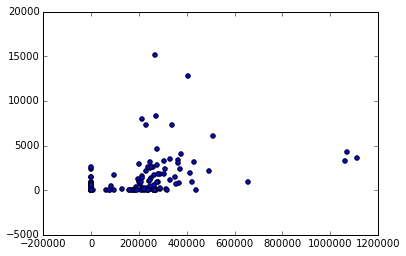

In [137]:
%matplotlib inline

import matplotlib.pyplot

features = ['salary',
            'to_messages',
                 'deferral_payments',
                 'total_payments',
                 'exercised_stock_options',
                 'bonus',
                 'restricted_stock',
                 'shared_receipt_with_poi',
                 'restricted_stock_deferred',
                 'total_stock_value',
                 'expenses',
                 'loan_advances',
                 'from_messages',
                 'other',
                 'from_this_person_to_poi',
                 'poi',
                 'director_fees',
                 'deferred_income',
                 'long_term_incentive',
                 'from_poi_to_this_person']
data = featureFormat(data_dict, features)

from ggplot import *
# plot the features
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

import pandas as pd
df = pd.DataFrame(data, columns = ['salary',
            'to_messages',
                 'deferral_payments',
                 'total_payments',
                 'exercised_stock_options',
                 'bonus',
                 'restricted_stock',
                 'shared_receipt_with_poi',
                 'restricted_stock_deferred',
                 'total_stock_value',
                 'expenses',
                 'loan_advances',
                 'from_messages',
                 'other',
                 'from_this_person_to_poi',
                 'poi',
                 'director_fees',
                 'deferred_income',
                 'long_term_incentive',
                 'from_poi_to_this_person'], index = range(1, 145))
df


ValueError: If using all scalar values, you must pass an index

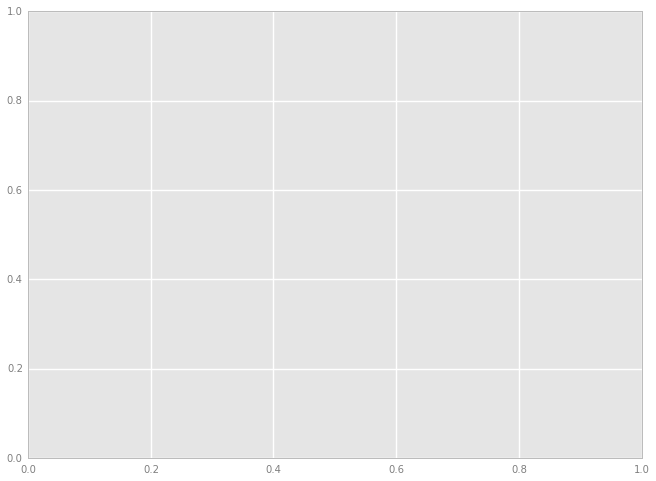

In [138]:
%matplotlib inline

ggplot(aes(x = salary, y = bonus), data = df) + geom_point()


[Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10, 
             ...
             135, 136, 137, 138, 139, 140, 141, 142, 143, 144],
            dtype='int64', length=144),
 Index([u'salary', u'to_messages', u'deferral_payments', u'total_payments',
        u'exercised_stock_options', u'bonus', u'restricted_stock',
        u'shared_receipt_with_poi', u'restricted_stock_deferred',
        u'total_stock_value', u'expenses', u'loan_advances', u'from_messages',
        u'other', u'from_this_person_to_poi', u'poi', u'director_fees',
        u'deferred_income', u'long_term_incentive', u'from_poi_to_this_person'],
       dtype='object')]

We clearly found an outlier here, and it's easy to find its name and remove it.

In [34]:
#find the outlier
for key, item in data_dict.iteritems():
    if item["salary"] > 1 * 1e7 and item["salary"] != "NaN":
        print key

TOTAL


In [35]:
# remove the outlier 'TOTAL'
data_dict.pop("TOTAL")

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

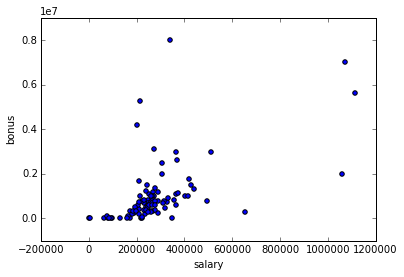

In [52]:
# reformat the new dataset
data = featureFormat(data_dict, features)

# create the plot
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

# plot the features again to check on outliers
matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [58]:
# check the outliers in 'bonus'.
for key, item in data_dict.iteritems():
    if item["bonus"] > 0.6 * 1e7 and item["bonus"] != "NaN":
        print key, item["bonus"], item["poi"]

LAVORATO JOHN J 8000000 False
LAY KENNETH L 7000000 True


In [59]:
# check the outliers in 'salary'.
for key, item in data_dict.iteritems():
    if item["salary"] > 1000000 and item["bonus"] != "NaN":
        print key, item["salary"], item["poi"]

LAY KENNETH L 1072321 True
SKILLING JEFFREY K 1111258 True
FREVERT MARK A 1060932 False


#### Task 1: Select Features
As a starting point, all the available features will be selected and put into the model. Later in this report, some features will be removed based on their PCA importance score.

In [ ]:
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi',
                 'salary',
                 'to_messages',
                 'deferral_payments',
                 'total_payments',
                 'exercised_stock_options',
                 'bonus',
                 'restricted_stock',
                 'shared_receipt_with_poi',
                 'restricted_stock_deferred',
                 'total_stock_value',
                 'expenses',
                 'loan_advances',
                 'from_messages',
                 'other',
                 'from_this_person_to_poi',
                 'poi',
                 'director_fees',
                 'deferred_income',
                 'long_term_incentive',
                 'from_poi_to_this_person']

## Task 2: Remove outliers

In [ ]:
def outlierCleaner(predictions, ages, net_worths):
    """
        clean away the 10% of points that have the largest
        residual errors (different between the prediction
        and the actual net worth)

        return a list of tuples named cleaned_data where
        each tuple is of the form (age, net_worth, error)
    """

    cleaned_data = []

    length = int(len(predictions) * 0.9)

    for i in range(len(predictions)):
        result = ages[i], net_worths[i], (net_worths[i] - predictions[i]) ** 2
        cleaned_data.append(tuple(result))

    cleaned_data.sort(key=lambda value: value[2])

    cleaned_data = cleaned_data[: length]
    print len(cleaned_data)
    return cleaned_data

In [ ]:
from sklearn.covariance import EllipticEnvelope
outlier_cleaner = EllipticEnvelope(contamination = 0.1)


## Part Two - Optimize Feature Selection

## Part Three - Pick and Tune an Algorithm

## Part Four - Validate and Evaluate

## Task 3: Create new feature(s)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
model = linear_model.LinearRegression()
model.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X, y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(-5, 5)
line_y = model.predict(line_X[:, np.newaxis])
line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])

# Compare estimated coefficients
print("Estimated coefficients (true, normal, RANSAC):")
print(coef, model.coef_, model_ransac.estimator_.coef_)

plt.plot(X[inlier_mask], y[inlier_mask], '.g', label='Inliers')
plt.plot(X[outlier_mask], y[outlier_mask], '.r', label='Outliers')
plt.plot(line_X, line_y, '-k', label='Linear regressor')
plt.plot(line_X, line_y_ransac, '-b', label='RANSAC regressor')
plt.legend(loc='lower right')
plt.show()

In [ ]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

## Task 4: Try a varity of classifiers

In [ ]:
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

In [ ]:
# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

## Task 5: Tune your classifier to achieve better than .3 precision and recall 

In [ ]:
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

## Task 6: Dump your classifier, dataset, and features_list so anyone can

In [ ]:
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)